# Skrinning Stuff

In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

import solarpy
import datetime

currentDir = os.getcwd()
sys.path.append(os.path.join(currentDir, '../code/'))
import geomUtils as geom
import IceSheet

In [2]:
geom.charLength('hex', [2.])

1.7320508075688774

In [3]:
diamsCrystal = np.array([0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.])  # m
gapMelt = 1.e-4  # m

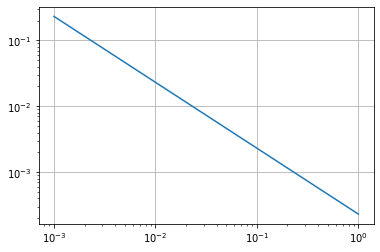

In [4]:
porosities = [(geom.periphery('hex', [x])*gapMelt/2)/(geom.area('hex', [x])) for x in diamsCrystal]
plt.loglog(diamsCrystal, porosities)
plt.grid()

In [5]:
# mySheet = IceSheet.IceSheet(iceType='blackIce', thickness=100.0, crystalSize=100.0)

In [6]:
# spatialNodeCount = 51
# timeStepCount = 101
# timeStep = 120  # s

In [7]:
# A, B, b, U0 = mySheet.setupModel(IC=[-1., 0.], windSpeed=5., aEnv=[0.15, 0.75, 0.1], TEnv=[-2.0, -20.0, -270.], S0=300., Nz=spatialNodeCount, tStep=timeStep)
# A

In [8]:
# Us = []
# Us.append(U0)
# U = U0

# for idx in range(1, timeStepCount):
#     U = np.linalg.solve(A, B.dot(U) + b)
#     Us.append(U)
    
# USoln = np.array(Us)

**TODO** Need to get dx, dy, zStep, tStep, zScale, tScale from mySheet

In [9]:
# timeIndeces = np.array([0, 1, 2, 5, 10, 30, timeStepCount-1])

# THi = 0.
# TLo = -2.
# TSoln = USoln*(THi - TLo) + TLo
# z = np.linspace(0, spatialNodeCount, spatialNodeCount)*mySheet._h0/spatialNodeCount*100  # cm
# t = np.linspace(0, timeStepCount, timeStepCount)*8770./timeStepCount/3660  # h

# fig, axs = plt.subplots(1, 2, figsize=(15, 5))
# for timeIndex in timeIndeces:
#     i = 0
#     axs[i].plot(range(spatialNodeCount), USoln[timeIndex, :], label='y node = '+'{}'.format(timeIndex))
#     i = 1
#     axs[i].plot(z, TSoln[timeIndex, :], label='t = '+'{:.2f} h'.format(t[timeIndex]))
# i = 0
# axs[i].set_xlabel('x node')
# axs[i].set_ylabel('U')
# i = 1
# axs[i].set_xlabel('z  / cm')
# axs[i].set_ylabel('T  / °C')
# for i in range(2):
#     axs[i].legend()
#     axs[i].grid()

### Simulate a Day or Two

In [17]:
# __init__
dateTimeStart = datetime.datetime(2021, 3, 1, 0, 0)
mySheet = IceSheet.IceSheet(dateTime=dateTimeStart, iceType='blackIce', thickness=200.0, crystalSize=100.0, lat=55.71, alt=10)


When: 2021-03-01 00:00:00
Where: lat = 55.71°, alt = 10 m
What: blackIce


In [24]:
# setupModel
spatialNodeCount = 51
timeStep = 5*60  # s
aEnv=[0.15, 0.75, 0.1]
TEnv=[-2.0, -20.0, -270.]

# get started
A, B, b, UInit = mySheet.setupModel(IC=[-0.92, 0.], windSpeed=5., aEnv=aEnv, TEnv=TEnv, zNodes=spatialNodeCount, tStep=timeStep, isVerbose=True)


thermal diffusivity a = 1.14e-06 m2/s
spatial stepsize dz = 4.00 mm
temporal stepsize dt = 300.00 s
timescale tScale = 35079.0 s
sigma = 10.690154021804274


In [25]:
# simulate
totalTime = 48*3600  # s
timeStepCount = totalTime//timeStep
timeStepCount

576

In [26]:
dateTimes, S0s, USoln = mySheet.simulate(UInit, aEnv, TEnv, timeStepCount)

In [58]:
idxSunUp = []
idxSunDn = []
for i in range(len(dateTimes)):
    if S0s[i] > 0 and S0s[i-1] == 0:
        idxSunUp.append(i)
    if S0s[i] == 0 and S0s[i-1] > 0:
        idxSunDn.append(i)
print(idxSunUp, idxSunDn)

[82, 369] [207, 496]


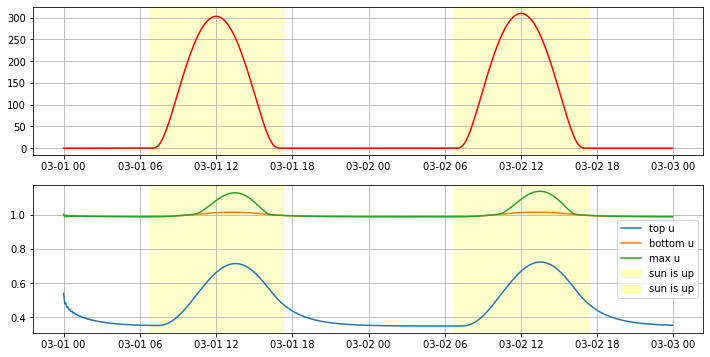

In [61]:
UMaxs = []
for j in range(len(USoln)):
    UMaxs.append(np.max(USoln[j, :]))

fig, axs = plt.subplots(2, 1, figsize=(12, 6))
i = 0
axs[i].plot(dateTimes, S0s, color='red', label='irradiance')
for j in range(len(idxSunUp)):
    axs[i].axvspan(dateTimes[idxSunUp[j]], dateTimes[idxSunDn[j]], color='yellow', alpha=0.2)
axs[i].grid()
i = 1
axs[i].plot(dateTimes, USoln[:, 0], label='top u')
axs[i].plot(dateTimes, USoln[:, -1], label='bottom u')
axs[i].plot(dateTimes, UMaxs, label='max u')
for j in range(len(idxSunUp)):
    axs[i].axvspan(dateTimes[idxSunUp[j]], dateTimes[idxSunDn[j]], color='yellow', alpha=0.2)
axs[i].grid()
axs[i].legend()

In [28]:
USoln.shape

(576, 51)

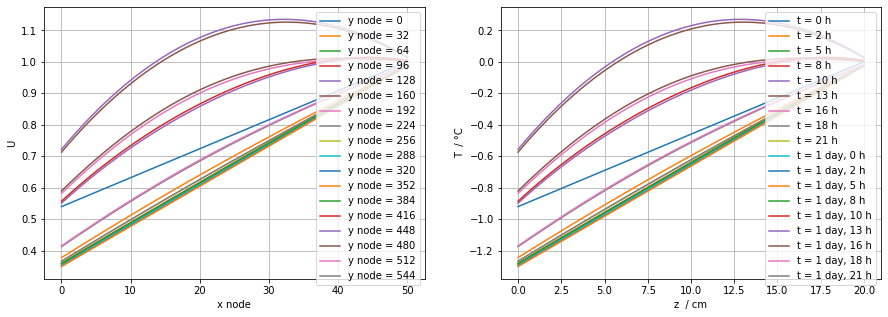

In [62]:
TSoln = mySheet._T(USoln)

z = np.linspace(0, spatialNodeCount, spatialNodeCount)*mySheet._h0/spatialNodeCount*100  # cm

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
for j in list(range(len(USoln)))[::32]:
    i = 0
    axs[i].plot(range(spatialNodeCount), USoln[j, :], label='y node = '+'{}'.format(j))
    i = 1
    axs[i].plot(z, TSoln[j, :], label='t = '+'{} h'.format(str(dateTimes[j]-dateTimes[0])[:-6]))
i = 0
axs[i].set_xlabel('x node')
axs[i].set_ylabel('U')
i = 1
axs[i].set_xlabel('z  / cm')
axs[i].set_ylabel('T  / °C')
for i in range(2):
    axs[i].legend()
    axs[i].grid()